In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Для парсинга лога, который выдает Gurobi

In [145]:
infile = open('Gurobi_20.txt',  'r')
outfile = open('Gurobi_20_CVRPTW_dist.txt',  'w')

pst = ['-', 'best', 'continuous,', 'Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','second', '']
symbols = ['e+']
copy = False
print('Введите количество городов (20, 50, 100): ')
k = int(input())
for line in infile:
    if 'Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time' in line:
        copy = True
    elif 'Cutting planes:' in line:
        copy = False
    elif copy:
        content = line.split()
        new_line = ''
        if len(content) == 10:
            if((content[5] not in pst) and (prev_content not in pst) and 'e+' not in content[5] and 'e+' not in prev_content):
                if(float(content[5]) - float(prev_content) > 0.1):
                    outfile.write('')
                    
            if(content[5] not in pst and (prev_content not in pst) and 'e+' not in content[5] and 'e+' not in prev_content):
                new_line += content[5]
                prev_content = content[5]
        elif len(content) == 8:
            if((content[3] not in pst) and (prev_content not in pst) and 'e+' not in content[3] and 'e+' not in prev_content):
                if(float(content[3]) - float(prev_content) > 0.1):
                    outfile.write('')

            if(content[3] not in pst and (prev_content not in pst) and ('e+' not in content[3]) and ('e+' not in prev_content)):
                new_line += content[3]
                prev_content = content[3]
        if len(content) != 0 and content[-1] != 'processors)' and '.' not in content[-1] and content[-1].isdigit() == False:
            new_line += '\t' + content[-1] 
            new_line = new_line[:-1] + '\n'
            if(new_line[0] != '\t' and new_line[0] != ''):
                outfile.write(new_line)
            if(k == 20):
                if(content[-1][:-1] == '300'):
                    outfile.write('\n')
            elif(k == 50):
                if(content[-1][:-1] == '1000'):
                    outfile.write('\n')
            
infile.close()
outfile.close()

Введите количество городов (20, 50, 100): 
20


### Отрисовка графиков

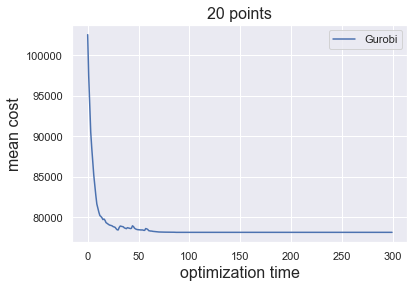

In [146]:
lst = [
    "Gurobi_20_CVRPTW_dist.txt",
#     "Gurobi_50_CVRPTW_dist.txt",
#     "Gurobi_100_CVRPTW_dist.txt"
]

all_cost_batches = []
for name in lst:
    with open(name, 'r') as f:
        file = f.readlines()
    costs = []
    times = []

    cur_cost = []
    cur_time = []

    m = float('-inf')
    for line in file:
        if line == '\n':
            costs.append(cur_cost)
            times.append(cur_time)

            cur_cost = []
            cur_time = []

            continue

        line = line.split('\t')
        cur_cost.append(float(line[0]))
        cur_time.append(float(line[1][:-1]))

        if cur_time[-1] > m:
            m = cur_time[-1]
    step = 1
    m = math.ceil(m)

    time_batched = [[0] * (m // step) for _ in range(len(times))]
    cost_batched = [[float('inf')] * (m // step) for _ in range(len(costs))]



    for num in range(len(costs)):
        cur_time = times[num]
        cur_cost = costs[num]

        last_best = float('inf')

        for n in range((m // step)):
            if n >= len(cur_time):
                time_batched[num][n] = time_batched[num][n-1]
                cost_batched[num][n] = cost_batched[num][n-1]
                continue

            cost_batched[num][int(n // step)] = min(cost_batched[num][int(n // step)], cur_cost[n])
    cost_batched = np.array(cost_batched)
    plt.plot(cost_batched.mean(0))
    
plt.legend(['Gurobi', 'SA', '2Opt', '3Opt'])
plt.xlabel('optimization time', fontsize=16)
plt.ylabel('mean cost', fontsize=16)
plt.title('20 points', fontsize=16)

plt.show()

In [ ]:
import pandas as pd
    import matplotlib.pyplot as plt
    tour = lkh[1]

    data = pd.read_csv('20/Example1.csv', sep='\t')
    xcoord = list(data['x_coord'])
    ycoord = list(data['y_coord'])

    plt.figure(figsize=(12,8))
    plt.scatter(xcoord, ycoord, color="red")

    plt.scatter(xcoord[0], ycoord[0], color="black", marker='D')
    plt.annotate("Depo", (xcoord[0]-1, ycoord[0]-5.5))

    N = count_towns - 1
    clients = [i for i in range(N+1) if i != 0]
    for i in clients:
        plt.annotate('${%d}$' % i, (xcoord[i]-1, ycoord[i]-5))

    colors = ["black", "blue", "red", "orange", "yellow", "grey"]
    i = 0
    for r in tour:
    #     print(r)
        for t in range(len(r)-1):
    #         print(r[t])
            plt.plot([xcoord[r[t]], xcoord[r[t+1]]], [ycoord[r[t]], ycoord[r[t+1]]], color=colors[i],alpha=0.4)
        plt.plot([xcoord[r[len(r)-1]], xcoord[r[0]]], [ycoord[r[len(r)-1]], ycoord[r[0]]],color=colors[i],alpha=0.4)
        i += 1
    
    plt.savefig('LKH_TOUR.png')